# Materialien zu <i>agla</i>

Autor: Holger Böttcher - hbomat@posteo.de

## Hyperbolische Geometrie 

## Einblicke 

Es wird das Kreisscheiben-Modell $D$ von Poincarè verwendet, welches sich auch durch 
<br>eine Projektion des Minkowski-Modells auf der oberen Schale eines zweischaligen 
<br>
Hyperboloids (hier $H$ genannt) ergibt <br><br>

In [1]:
%run agla/start

### Hyperbolischer Abstand
(Erläuterungen im *D*-Modell)

In [2]:
OD = hPunkt(0, 0)       # der "Ursprung"
R = hPunkt(1, 0)        # Randpunkt
Q = hPunkt(0.2, 0.45)   # beliebiger Punkt

OD.abstand(R), Q.abstand(R), Q.abstand(OD) 

# (der hyperbolische Abstand eines Punktes zu einem Randpunkt ist 
# unendlich, sonst ist er endlich)

(∞, ∞, 1.0785603435107454)

In [3]:
# Eine Liste von Zahlen aus [0, 1] 

xx = [i * Rational(1, 10) for i in range(11)]; xx   

[0, 1/10, 1/5, 3/10, 2/5, 1/2, 3/5, 7/10, 4/5, 9/10, 1]

In [4]:
# zugehörige Punkte auf der  x-Achse

pp = [v(xx[i], 0) for i in range(11)]; pp   

[Vektor, Vektor, Vektor, Vektor, Vektor, Vektor, Vektor, Vektor, Vektor, Vekto
r, Vektor]

In [5]:
# die euklidischen Abstände aufeinanderfolgender Punkte sind konstant

[pp[i+1].abstand(pp[i]) for i in range(10)]

[1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10, 1/10]

In [6]:
# die Abstände zwischen den entsprechenden hyperbolischen Punkten

hp = [hPunkt(p) for p in pp]

In [7]:
# wachsen an; sie hängen von der Lage der Punkte ab

[N(hp[i+1].abstand(hp[i]), 3) for i in range(10)]   

[0.201, 0.205, 0.214, 0.228, 0.251, 0.288, 0.348, 0.463, 0.747, +inf]

<br>
Im betrachteten $D$-Modell ist es notwendig, die unendlche hyperbolische Ebene mittels 
<br>einer endlichen Kreisscheibe darzustellen

Die prinzipielle Möglichkeit eines solchen Vorgehens wird mit folgender Überlegung 
<br>und der zugehörigen Grafik veranschaulicht:

Ein Wanderer versucht, vom Ursprung aus die Kreislinie zu erreichen wobei er sich 
<br>entlang der $x$-Achse bewegt. Hat er die Hälfte des Abstandes zu dieser Linie 
<br>durchschritten, soll er dabei auch um die Hälfte kleiner geworden sein (d.h., 
<br>daß die Abstände lageabhängig sind). Damit werden seine Schritte kürzer und er 
<br>kommt entsprechend langsamer voran. Hat er von der verbleibenden Hälfte wieder 
<br>die Hälfte durchschritten, ist er nur noch ein Viertel so groß wie am Anfang.<br>
Geht das so weiter, wird er jeden Punkt des Intervalls [0, 1) erreichen, die Kreislinie
<br>jedoch nie.
<br><br> 

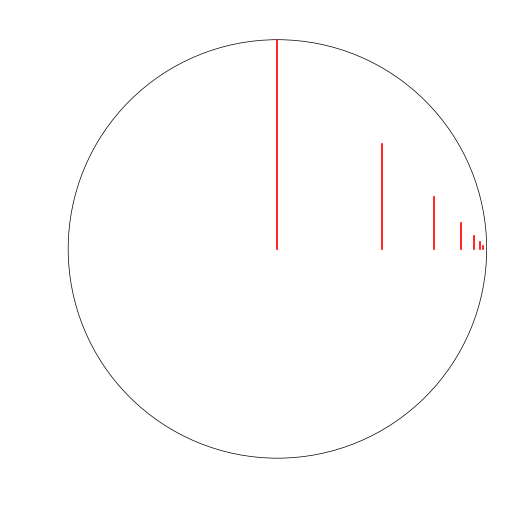

In [8]:
def figur(n):
    return Strecke(9*v(1-1/2^n, 0), 9*v(1-1/2^n, 1/2^n))

zeichne(Kreis(O2, 9), *[[figur(i), rot, 2] for i in range(7)], achsen=nein)

### Hyperbolische Geraden im *D*-Modell

In [10]:
ek = EinhKreis2   # der (vordefinierte) Einheitskreis

In [11]:
A1 = hPunkt(ek.pkt(70)); B1 = hPunkt(ek.pkt(80)); g1 = hGerade(A1, B1)
A2 = hPunkt(ek.pkt(65)); B2 = hPunkt(ek.pkt(85)); g2 = hGerade(A2, B2)
A3 = hPunkt(0.22, 0.25); B3 = hPunkt(-0.2, 0.65); g3 = hGerade(A3, B3)
A4 = OD; B4 = hPunkt(-0.2, 0.8); g4 = hGerade(A4, B4)
A5 = hPunkt(ek.pkt(30)); B5 = hPunkt(ek.pkt(240)); g5 = hGerade(A5, B5)
gg = g1, g2, g3, g4, g5

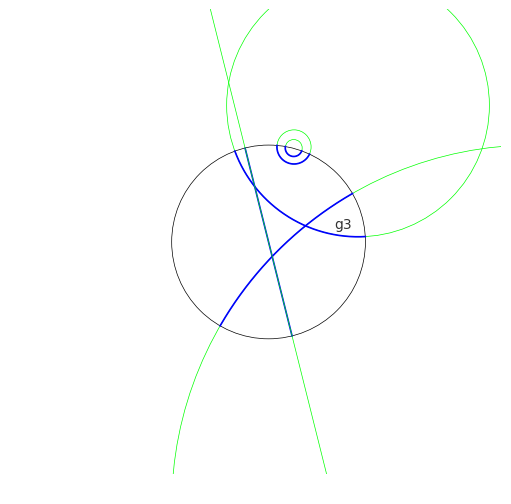

In [12]:
# Hyperbolische Geraden und ihre euklidischen Trägerkreise

sicht_box(2.4)
zeichne(ek, 
        *[[g, blau, 2] for g in gg], 
        *[[g.träger, grün] for g in gg], 
        achsen=nein, bez=[(v(0.68, 0.14), 'g3')])

<br>Überprüfung der <b>Winkel mit dem Einheitskreis</b> am Beispiel  $g_3$<br><br>
Da der Einheitskreis kein hyperbolisches Objekt ist, wird zu Kurve-Objekten 
<br>übergegangen und die Winkel in deren Schnittpunkten berechnet
<br>

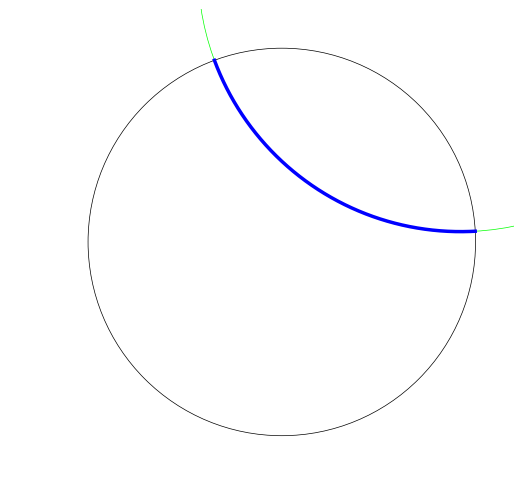

In [13]:
sicht_box(1.2)
zeichne(ek, [g3, blau, 3], [g3.träger, grün], achsen=nein)

Die Parameterwerte der Schnittpunkte des Trägerkreises mit dem Einheitskreis <br> wurden bereits bei der Erzeugung von $g_3$ ermittelt und sind mit

In [14]:
g3.ber   

[200.352262848382, 273.170744988761]

abrufbar; diese Gradwerte sind für ihren Gebrauch als Kurvenparamter in
Bogenmaß <br>umzurechnen
<br><br>
Weiterhin fehlen noch die entsprechenden Parameterwerte der Schnittpunkte für den Einheitskreis<br>
Diese können so beschafft werden:
<br><br>
Die Schnittpunkte sind

In [15]:
S = g3.träger.pkt(g3.ber[0]), g3.träger.pkt(g3.ber[1])
S

(Vektor, Vektor)

In [16]:
S[0].dez, S[1].dez

(Vektor, Vektor)

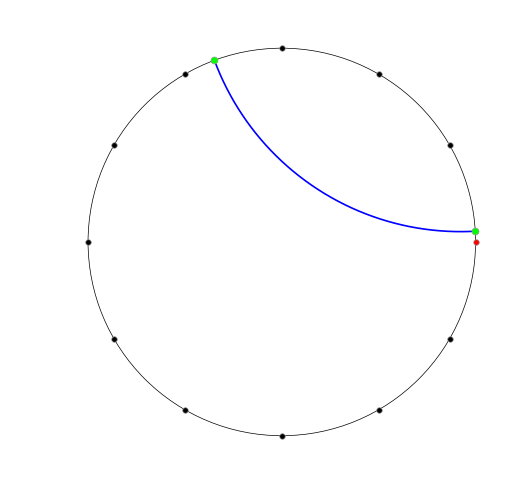

In [17]:
zeichne(ek, [g3, blau, 2], [S[0], grün, 2], [S[1], grün, 2], 
        [ek.pkt(0), rot],
        *[ek.pkt(w) for w in range(30, 360, 30)],
        achsen=nein)

Die obige Grafik enthält zusätzlich eine Skalierung der Parameterwerte des Einheits-<br>
kreises (in 30-Grad-Schritten), die zur Ermittlung von Startwerten im folgenden numme-<br>
rischen Verfahren benutzt werden kann

In [18]:
t0 = ek.in_kurve.par_wert(S[0], rad(110)).n()   # rad(110) - Startwert
t1 = ek.in_kurve.par_wert(S[1], rad(0)).n()     # rad(0) ebenso

t0 = grad(t0).n(); t1 = grad(t1).n()            # Umrechnung in Grad, 
        # da die Parameter für Kurven in Radian, für Kreise in Grad 
        # anzugeben sind
t0, t1        

(110.352262848382, 3.17074498876092)

Einsetzen der Werte in die entsprechende Methode des Einhheitskreises bestätigt die <br>Richtigkeit der Rechnung

In [19]:
ek.pkt(t0).dez, S[0].dez

(Vektor, Vektor)

In [20]:
ek.pkt(t1).dez, S[1].dez

(Vektor, Vektor)

Die Berechnung der Winkel unter Zuhilfenahme der Parameterwerte ergibt, dass der <br>Kreis, auf dem $g_3$ liegt, den
Einheitskreis mit zwei rechten Winkeln schneidet

In [21]:
g3.e.in_kurve.winkel(ek.in_kurve, rad(g3.ber[0]), rad(t0)), \
g3.e.in_kurve.winkel(ek.in_kurve, rad(g3.ber[1]), rad(t1))

(90.0000000000009, 90.0000000000001)

### Parallelität von Geraden im *D*-Modell

In [22]:
g = g5; P = hPunkt(0, 0.5)

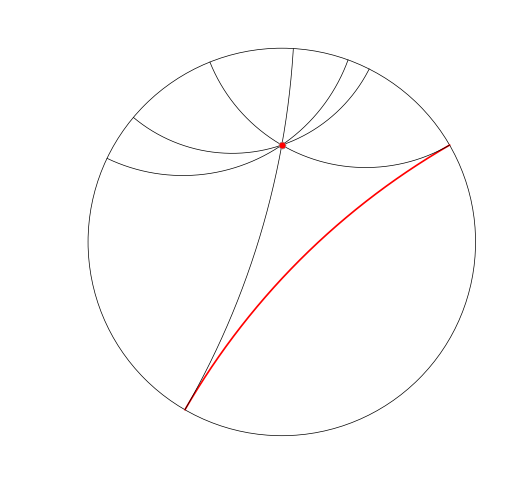

In [23]:
zeichne(ek, [g5, rot, 2],        
    hGerade(P, A5), hGerade(P, B5),
    hGerade(P, hPunkt(ek.pkt(70))), 
    hGerade(P, hPunkt(ek.pkt(140))),
    [P, 2, rot, 2],    
    achsen=nein)

### Ein Dreieck und sein Inkreis im *D*-Modell

In [24]:
A = hPunkt(-0.4, -0.3); B = hPunkt(0.25, 0.3); C = hPunkt(0, 0.6)

d = hDreieck(A, B, C)

ik = d.inkreis   # Rechenzeit!

In [26]:
ik.radius, ik.e.radius, ik.e.mitte.dez   # hyperbolischer und
                       # euklidischer Radius sind verschieden

(0.300028644326042, 0.134924441185683, Vektor)

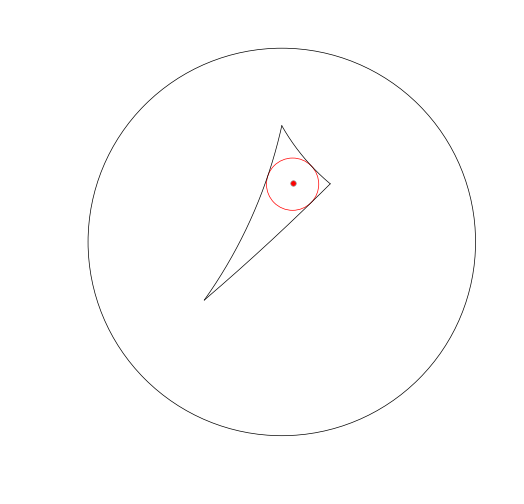

In [27]:
sicht_box(-1.2, 1.2)
zeichne(ek, d, [ik, rot], [ik.mitte, rot], achsen=nein)

### Hyperbolische Objekte im *H*-Modell

Die obere Schale des zweischaligen Einheithyperboloids ist als Träger des $H$-Modells <br>vordefiniert

In [28]:
HypSchale, HypSchale.imp

(Fläche, x**2 + y**2 - z**2 + 1 = 0)

Einige hyperbolische Punkte

In [29]:
OH = hPunkt(0, 0, 'H')   # der "Ursprung"
P = hPunkt(1.2, -0.6, 'H')
OH.e, P.e

(Vektor, Vektor)

In [30]:
AH, BH, CH = [D2H(p) for p in (A, B, C)]   # Überführung der Punkte 
                                       # aus dem D- in das H-Modell
AH.e.dez, BH.e.dez, CH.e.dez

(Vektor, Vektor, Vektor)

In [31]:
g1 = hGerade(OH, P)
g2 = hGerade(hPunkt(1.2, -2, 'H'), hPunkt(-1.4, -1.8, 'H'))
dH = hDreieck(AH, BH, CH)

In [32]:
sicht_box(3)
zeichne(HypSchale, [g1, gelb, 2], [g2, blau, 2], [OH, 2])

In [33]:
sicht_box(3)
zeichne(HypSchale, [dH, rot, 2], AH, BH, CH)

Das im $H$-Modell erzeugte Dreieck ist zu dem Ausgangsdreieck im $D$-Modell <br>kongruent, die Seitenlängen und Innenwinkel beider Dreiecke sind gleich

In [34]:
d.längen

(1.01619451814309, 2.30090014390345, 1.91349367757599)

In [35]:
dH.längen

(1.01619451814309, 2.30090014390345, 1.91349367757599)

In [36]:
d.winkel

(13.997173303377476, 84.70311151454864, 41.90517444580712)

In [37]:
dH.winkel

(13.997173303377476, 84.70311151454867, 41.90517444580712)

### Gemeinsame Darstellung von Objekten des $D$- und $H$-Modells

Die zur Überführung in das $H$-Modell benutzte Funktion $D2H$ realisiert eine Zentral-<br>projektion mit dem Zentrum im Punkt

In [38]:
Z = v(0, 0, -1); Z

Vektor

wobei die zweidimensionale Ebene (als Träger des $D$-Modells) in die $xy$-Ebene des <br>Raumes gelegt wurde

Zur gemeinsamen Darstellung werden die Objekte des $D$-Modells in Objekte des <br>$D3$-(Hilfs-)Modells mittels der Funktion $D2D3$ überführt

In [39]:
A3, B3, C3 = [D2D3(p) for p in (A, B, C)]

In [40]:
A3.e, B3.e, C3.e

(Vektor, Vektor, Vektor)

In [41]:
d3 = hDreieck(A3, B3, C3)

In [42]:
zeichne([HypSchale, gelb],                    # ca. 20 sec
        [EinhKreis, 'khaki', 'füll=ja'],
        [dH, 2], [d3, 2],
        A3, [B3, grün], [C3, blau],
        AH, [BH, grün], [CH, blau], [Z, rot],
        Strecke(Z, AH.e),
        [Strecke(Z, BH.e), grün],
        [Strecke(Z, CH.e), blau]
       )